## **INSTALLING SURPRISE PACKAGE**

In [1]:
!pip3 install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **IMPORTS**

In [2]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from surprise import SVD, similarities
from surprise import Dataset, accuracy
from surprise import NormalPredictor
from surprise import Reader
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import cross_validate, train_test_split, KFold

## **LOADING DATASET**

In [3]:
rating = pd.read_csv('ratings_small.csv')

In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
from surprise import BaselineOnly
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

**3C. Computing the average MAE and RMSE of the Probabilistic Matrix Factorization (PMF), User based Collaborative Filtering, Item based Collaborative Filtering, under the 5-folds cross-validation**

In [6]:
mae_list  = []
rmse_list = []

# **Probabilistic Matrix Factorization**

In [7]:
model = SVD(biased = False)
results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = results['test_mae'].mean()
mean_rmse = results['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rmse}')

mae_list.append(mean_mae)
rmse_list.append(mean_rmse)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0185  1.0006  1.0142  1.0008  1.0107  1.0090  0.0072  
MAE (testset)     0.7858  0.7726  0.7822  0.7743  0.7805  0.7791  0.0049  
Fit time          6.96    8.78    4.24    5.07    4.18    5.84    1.78    
Test time         0.23    0.20    0.18    0.12    0.19    0.19    0.04    
Average MAE: 0.7790684753091051
Average RMSE: 1.008962333518911


# **Item based Collaborative Filtering**

In [8]:
sim_options = {'user_based':  False}
knn_m = KNNBasic(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rmse = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rmse}')

mae_list.append(mean_mae)
rmse_list.append(mean_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9416  0.9370  0.9363  0.9295  0.9279  0.9344  0.0050  
MAE (testset)     0.7254  0.7233  0.7224  0.7153  0.7163  0.7206  0.0040  
Fit time          3.91    3.67    3.50    4.50    4.52    4.02    0.42    
Test time         5.30    5.84    6.46    5.39    5.32    5.66    0.45    
Average MAE: 0.7205624556935298
Average RMSE: 0.9344496228850776


# **User based Collaborative Filtering**

In [9]:
sim_options = {'user_based': True}

knn_m = KNNBasic(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rmse = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rmse}')

mae_list.append(mean_mae)
rmse_list.append(mean_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9805  0.9523  0.9731  0.9730  0.9620  0.9682  0.0099  
MAE (testset)     0.7525  0.7348  0.7487  0.7443  0.7395  0.7440  0.0063  
Fit time          0.16    0.13    0.14    0.14    0.13    0.14    0.01    
Test time         1.19    1.26    1.15    1.19    1.26    1.21    0.04    
Average MAE: 0.7439696243248811
Average RMSE: 0.9681862301591149


# **MAE & RMSE Results**

In [10]:
print("MAE & RMSE for Probabilistic Matrix Factorization Model : " + str(mae_list[0]) + ' & ' + str(rmse_list[0]))
print("MAE & RMSE for Item Based Collaborative Filtering Model : " + str(mae_list[1]) + ' & ' + str(rmse_list[1]))
print("MAE & RMSE for User Based Collaborative Filtering Model : " + str(mae_list[2]) + ' & ' + str(rmse_list[2]))

MAE & RMSE for Probabilistic Matrix Factorization Model : 0.7790684753091051 & 1.008962333518911
MAE & RMSE for Item Based Collaborative Filtering Model : 0.7205624556935298 & 0.9344496228850776
MAE & RMSE for User Based Collaborative Filtering Model : 0.7439696243248811 & 0.9681862301591149


**3E. Examine how the cosine, MSD (Mean Squared Difference), and Pearson similarities impact the performances of User based Collaborative Filtering and Item based Collaborative Filtering.**

In [11]:
item_mae=[]
item_rmse=[]
user_mae=[]
user_rmse=[]

## **COSINE SIMILARITY**

In [12]:
sim_options = {'user_based':  False, "name": 'cosine'}
knn_m = KNNBasic(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rmse = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rmse}')

item_mae.append(mean_mae)
item_rmse.append(mean_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9998  0.9848  0.9982  0.9940  0.9980  0.9950  0.0054  
MAE (testset)     0.7801  0.7682  0.7757  0.7743  0.7755  0.7748  0.0038  
Fit time          10.98   11.41   11.59   12.46   11.37   11.56   0.49    
Test time         4.93    5.32    5.04    5.26    5.19    5.15    0.14    
Average MAE: 0.7747530869514511
Average RMSE: 0.9949706605236919


In [13]:
sim_options = {'user_based':  True, "name": 'cosine'}
knn_m = KNNBasic(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rmse = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rmse}')

user_mae.append(mean_mae)
user_rmse.append(mean_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9977  0.9949  0.9960  0.9857  0.9904  0.9929  0.0043  
MAE (testset)     0.7707  0.7690  0.7693  0.7610  0.7664  0.7673  0.0034  
Fit time          0.30    0.30    0.30    0.31    0.31    0.31    0.00    
Test time         1.23    1.27    1.20    1.31    1.26    1.25    0.04    
Average MAE: 0.7672612644337056
Average RMSE: 0.9929470583017157


## **MEAN SQUARED DIFFERENCE SIMILARITY**

In [14]:
sim_options = {'user_based':  False, "name": 'msd'}
knn_m = KNNBasic(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rmse = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rmse}')

item_mae.append(mean_mae)
item_rmse.append(mean_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9296  0.9367  0.9340  0.9301  0.9423  0.9345  0.0047  
MAE (testset)     0.7174  0.7221  0.7212  0.7198  0.7254  0.7212  0.0026  
Fit time          3.55    3.57    3.58    3.46    3.55    3.54    0.04    
Test time         6.52    5.52    5.51    5.35    6.50    5.88    0.52    
Average MAE: 0.7211793568579211
Average RMSE: 0.9345332555005503


In [15]:
sim_options = {'user_based':  True, "name": 'msd'}
knn_m = KNNBasic(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rmse = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rmse}')

user_mae.append(mean_mae)
user_rmse.append(mean_rmse)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9697  0.9683  0.9712  0.9659  0.9638  0.9678  0.0027  
MAE (testset)     0.7454  0.7477  0.7457  0.7439  0.7381  0.7442  0.0033  
Fit time          0.11    0.17    0.13    0.14    0.14    0.14    0.02    
Test time         2.01    1.36    2.25    1.27    1.23    1.62    0.42    
Average MAE: 0.7441514412612129
Average RMSE: 0.9677774592208344


## **PEARSON SIMILARITY**

In [16]:
sim_options = {'user_based':  False, "name": 'pearson'}
knn_m = KNNBasic(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rmse = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rmse}')

item_mae.append(mean_mae)
item_rmse.append(mean_rmse)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9817  0.9894  0.9949  0.9881  0.9943  0.9897  0.0048  
MAE (testset)     0.7618  0.7728  0.7693  0.7657  0.7702  0.7680  0.0038  
Fit time          14.78   15.86   14.90   14.82   14.78   15.03   0.42    
Test time         5.48    5.19    5.39    6.25    5.28    5.52    0.38    
Average MAE: 0.7679590594940604
Average RMSE: 0.9896908080819997


In [17]:
sim_options = {'user_based':  True, "name": 'pearson'}
knn_m = KNNBasic(sim_options=sim_options)
scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

mean_mae = scores['test_mae'].mean()
mean_rmse = scores['test_rmse'].mean()

print(f'Average MAE: {mean_mae}')
print(f'Average RMSE: {mean_rmse}')

user_mae.append(mean_mae)
user_rmse.append(mean_rmse)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9985  0.9854  0.9949  1.0007  1.0051  0.9969  0.0066  
MAE (testset)     0.7708  0.7652  0.7719  0.7736  0.7784  0.7720  0.0043  
Fit time          0.40    0.41    0.42    0.41    0.41    0.41    0.01    
Test time         1.21    1.19    1.32    1.23    1.31    1.25    0.05    
Average MAE: 0.7719676731634377
Average RMSE: 0.9969254629724293


# **MODELS COMPARISON**

In [28]:
user_mae

[0.7672612644337056, 0.7441514412612129, 0.7719676731634377]

Text(0, 0.5, 'MAE')

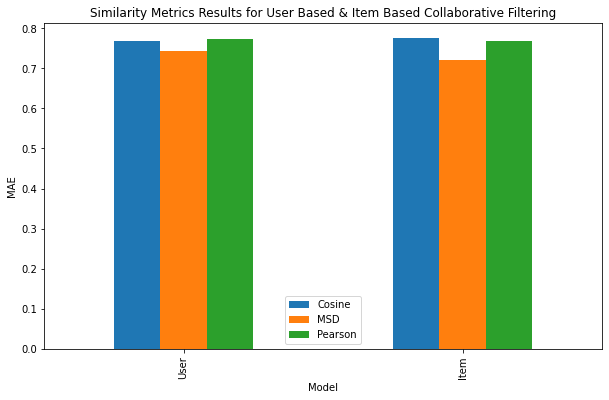

In [30]:
import pandas as pd

plotdata = pd.DataFrame({

    "Cosine":[user_mae[0],item_mae[0]],

    "MSD":[user_mae[1],item_mae[1]],

    "Pearson":[user_mae[2],item_mae[2]]},

    index=["User", "Item"])

plotdata.plot(kind="bar",figsize=(10, 6))

plt.title("Similarity Metrics Results for User Based & Item Based Collaborative Filtering")

plt.xlabel("Model")

plt.ylabel("MAE")

Text(0, 0.5, 'RMSE')

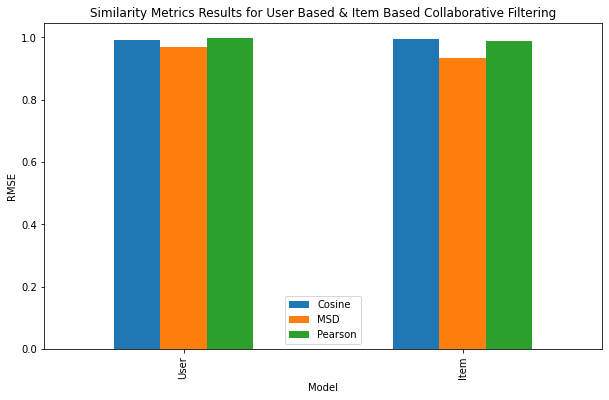

In [31]:
import pandas as pd

plotdata = pd.DataFrame({

    "Cosine":[user_rmse[0],item_rmse[0]],

    "MSD":[user_rmse[1],item_rmse[1]],

    "Pearson":[user_rmse[2],item_rmse[2]]},

    index=["User", "Item"])

plotdata.plot(kind="bar",figsize=(10, 6))

plt.title("Similarity Metrics Results for User Based & Item Based Collaborative Filtering")

plt.xlabel("Model")

plt.ylabel("RMSE")

## **RUNNING THE MODELS FOR DIFFERENT K VALUES**

In [19]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

k_user_mae  = []
k_user_rmse = []

k_item_mae  = []
k_item_rmse = []

In [20]:
for i in k_values:
  print("For k = " + str(i))
  sim_options = {'user_based':  False}
  knn_m = KNNBasic(i, sim_options=sim_options)
  scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

  mean_mae = scores['test_mae'].mean()
  mean_rmse = scores['test_rmse'].mean()

  print(f'Average MAE: {mean_mae}')
  print(f'Average RMSE: {mean_rmse}')
  print('-----------------------------------------------------------------------')

  k_item_mae.append(mean_mae)
  k_item_rmse.append(mean_rmse)

For k = 1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3002  1.3025  1.3140  1.2943  1.3108  1.3044  0.0072  
MAE (testset)     0.9634  0.9585  0.9736  0.9609  0.9696  0.9652  0.0056  
Fit time          3.50    3.94    3.52    3.49    3.36    3.56    0.20    
Test time         3.64    3.82    3.76    3.79    3.88    3.78    0.08    
Average MAE: 0.9651853947919479
Average RMSE: 1.304356285130826
-----------------------------------------------------------------------
For k = 3
Computing the msd similarity matrix...
Done c

In [21]:
for i in k_values:
  print("For k = " + str(i))
  sim_options = {'user_based':  True}
  knn_m = KNNBasic(i, sim_options=sim_options)
  scores = cross_validate(knn_m, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

  mean_mae = scores['test_mae'].mean()
  mean_rmse = scores['test_rmse'].mean()

  print(f'Average MAE: {mean_mae}')
  print(f'Average RMSE: {mean_rmse}')
  print('-----------------------------------------------------------------------')

  k_user_mae.append(mean_mae)
  k_user_rmse.append(mean_rmse)

For k = 1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2090  1.2166  1.2143  1.2121  1.2087  1.2121  0.0030  
MAE (testset)     0.8979  0.9045  0.9063  0.9063  0.9016  0.9033  0.0032  
Fit time          0.10    0.13    0.14    0.13    0.17    0.13    0.02    
Test time         0.74    0.66    0.61    0.79    1.10    0.78    0.17    
Average MAE: 0.9033196514803118
Average RMSE: 1.2121378387059265
-----------------------------------------------------------------------
For k = 3
Computing the msd similarity matrix...
Done 

# **GRAPH PLOTS**

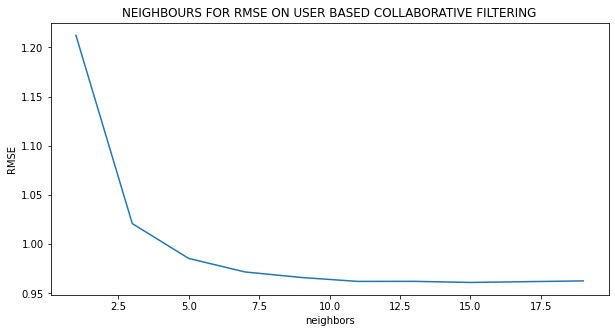

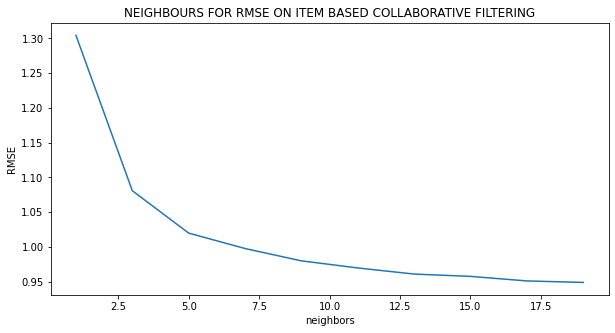

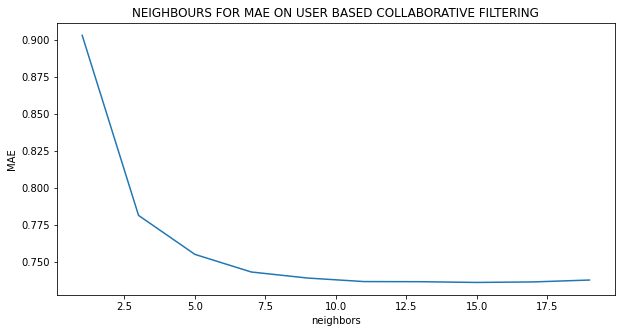

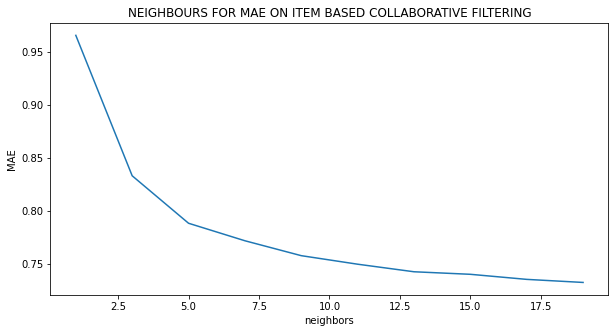

In [22]:
plt.figure(figsize=(10,5))
plt.plot(k_values, k_user_rmse)
plt.title('NEIGHBOURS FOR RMSE ON USER BASED COLLABORATIVE FILTERING')
plt.xlabel('neighbors')
plt.ylabel('RMSE')

plt.show()

plt.figure(figsize=(10,5))
plt.plot(k_values, k_item_rmse)
plt.title('NEIGHBOURS FOR RMSE ON ITEM BASED COLLABORATIVE FILTERING')
plt.xlabel('neighbors')
plt.ylabel('RMSE')

plt.show()

plt.figure(figsize=(10,5))
plt.plot(k_values, k_user_mae)
plt.title('NEIGHBOURS FOR MAE ON USER BASED COLLABORATIVE FILTERING')
plt.xlabel('neighbors')
plt.ylabel('MAE')

plt.show()

plt.figure(figsize=(10,5))
plt.plot(k_values, k_item_mae)
plt.title('NEIGHBOURS FOR MAE ON ITEM BASED COLLABORATIVE FILTERING')
plt.xlabel('neighbors')
plt.ylabel('MAE')


plt.show()

In [23]:
k_user_rmse

[1.2121378387059265,
 1.0208874336543894,
 0.985551419088383,
 0.9717781340998153,
 0.9661753570701187,
 0.9621935007024579,
 0.9622433300403485,
 0.961132530499688,
 0.9619317901466713,
 0.9626985711039303]

In [24]:
k_item_rmse

[1.304356285130826,
 1.0809152455598598,
 1.019943491434817,
 0.9977613962707894,
 0.9800234170069675,
 0.9698030489403772,
 0.9610216220211779,
 0.9576799072710351,
 0.9511544499249572,
 0.9489719960473538]

In [25]:
k_user_mae

[0.9033196514803118,
 0.781370321482865,
 0.7549697993160158,
 0.7430360263901009,
 0.7389422241375303,
 0.7365494850099561,
 0.7364636502546752,
 0.7359606328641831,
 0.7363162542682368,
 0.737589093601167]

In [26]:
k_item_mae

[0.9651853947919479,
 0.8331236718194889,
 0.7884839260402092,
 0.7720224716729552,
 0.7579979631716224,
 0.749974280114299,
 0.7428630859752741,
 0.7404731656811261,
 0.7357030450050683,
 0.7328173953853395]

In [27]:
print('BEST K - VALUES')
print('------------------')

print('USER BASED COLLABORATIVE FILTERING - MAE')
print('Best K: ', k_values[np.argmin(k_user_mae)])
print('Best K MAE: ', np.min(k_user_mae))

print('\nUSER BASED COLLABORATIVE FILTERING - RMSE')
print('Best K: ', k_values[np.argmin(k_user_rmse)])
print('Best K RMSE: ', np.min(k_user_rmse))

print('\nITEM BASED COLLABORATIVE FILTERING - MAE')
print('Best K: ', k_values[np.argmin(k_item_mae)])
print('Best K MAE: ', np.min(k_item_mae))

print('\nITEM BASED COLLABORATIVE FILTERING - RMSE')
print('Best K: ', k_values[np.argmin(k_item_rmse)])
print('Best K RMSE: ', np.min(k_item_rmse))

BEST K - VALUES
------------------
USER BASED COLLABORATIVE FILTERING - MAE
Best K:  15
Best K MAE:  0.7359606328641831

USER BASED COLLABORATIVE FILTERING - RMSE
Best K:  15
Best K RMSE:  0.961132530499688

ITEM BASED COLLABORATIVE FILTERING - MAE
Best K:  19
Best K MAE:  0.7328173953853395

ITEM BASED COLLABORATIVE FILTERING - RMSE
Best K:  19
Best K RMSE:  0.9489719960473538
